In [82]:
import matplotlib.pyplot as plt
from IPython.display import Image
import os
import cv2
from sklearn.cluster import KMeans
from matplotlib.pyplot import imshow
import skimage
import numpy as np
import networkx as nx
from pathlib import Path

In [2]:
path = '/nucleus/projects/HDSI-capstone/Turner_2017/'
imgs = os.listdir(path)
imgs.remove('labels')
#imgs.remove('.DS_Store')

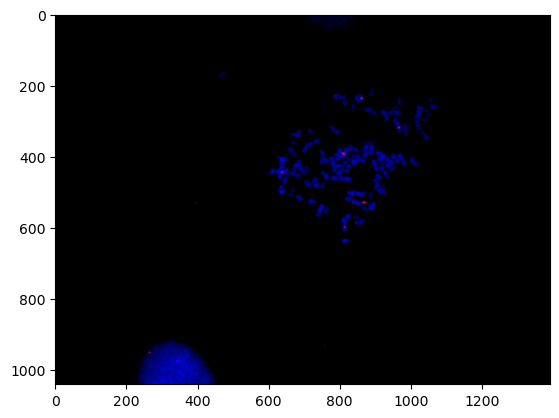

In [3]:
image = skimage.io.imread(path + imgs[0])
imshow(image)

In [4]:
#for i in range(1,5):
    #img = skimage.io.imread('/nucleus/projects/HDSI-capstone/metaphase_crops/Image_0'+str(i)+'_cell_1_dapi.jpeg')
    #print(imshow(img < 130))
    # count clusters
    # keep array of counts
    # return array
    
# make graph of counts

In [5]:
#skimage.io.imshow(image > 100)

Number of clusters: 1


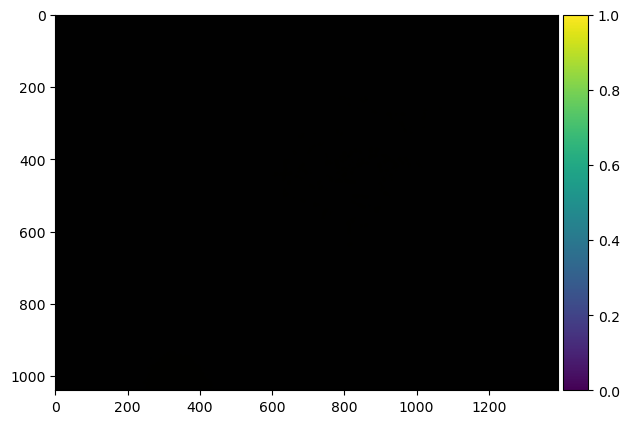

In [7]:
binary_image = image > 100

inverted_image = np.logical_not(binary_image)
labeled_image = skimage.measure.label(inverted_image)

num_clusters = np.max(labeled_image)

print(f'Number of clusters: {num_clusters}')

skimage.io.imshow(labeled_image)
skimage.io.show()

In [8]:
cluster_counts = []
for x in imgs:
    # read image
    img = skimage.io.imread(path + x)
    
    # image threshold
    binary_img = img > 130
    skimage.io.imshow(binary_img)

    # invert and label
    inverted_img = np.logical_not(binary_img)
    labeled_img = skimage.measure.label(inverted_img)

    # count clusters
    num_clusters = np.max(labeled_img)
    cluster_counts.append(num_clusters)

Error in callback <function _draw_all_if_interactive at 0x7fd58e350180> (for post_execute):


ValueError: arrays must be of dtype byte, short, float32 or float64

ValueError: arrays must be of dtype byte, short, float32 or float64

<Figure size 640x480 with 1 Axes>

In [87]:
counts = list(zip(imgs, cluster_counts))

Text(0.5, 1.0, 'Chromsome Cluster Counts in Cells')

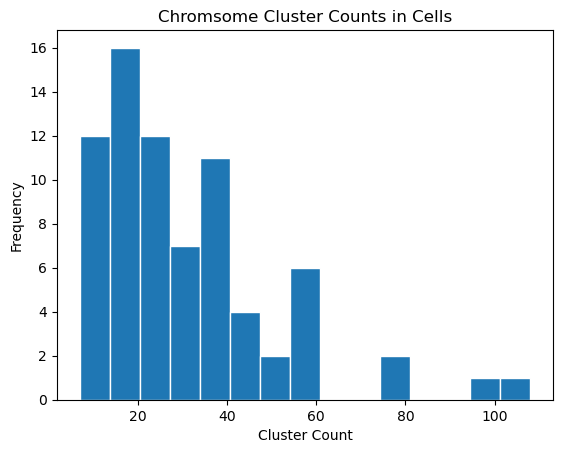

In [100]:
count_plot = plt.hist(cluster_counts, ec='w', bins=15)
plt.xlabel('Cluster Count')
plt.ylabel('Frequency')
plt.title('Chromsome Cluster Counts in Cells')

In [37]:
cluster_counts = []
for x in imgs:
    # read image
    img = skimage.io.imread(path + x)
    
    # image threshold
    binary_img = img < 130

    # invert and label
    inverted_img = np.logical_not(binary_img)
    labeled_img = skimage.measure.label(inverted_img)

    # count clusters
    num_clusters = np.max(labeled_img)
    cluster_counts.append(num_clusters)

In [38]:
counts = list(zip(imgs, cluster_counts))

Text(0.5, 1.0, 'Chromsome Cluster Counts in Cells')

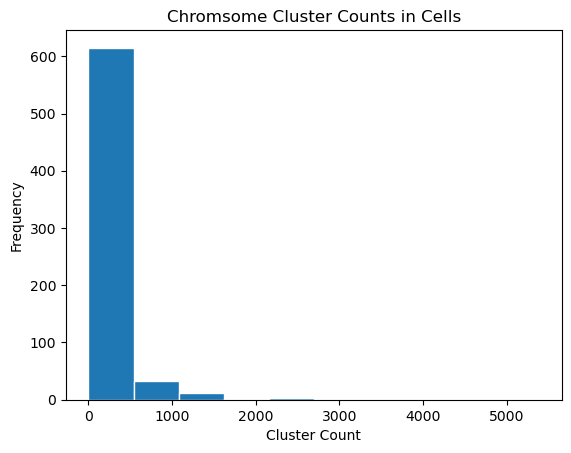

In [39]:
count_plot = plt.hist(cluster_counts, ec='w', bins = [])
plt.xlabel('Cluster Count')
plt.ylabel('Frequency')
plt.title('Chromsome Cluster Counts in Cells')

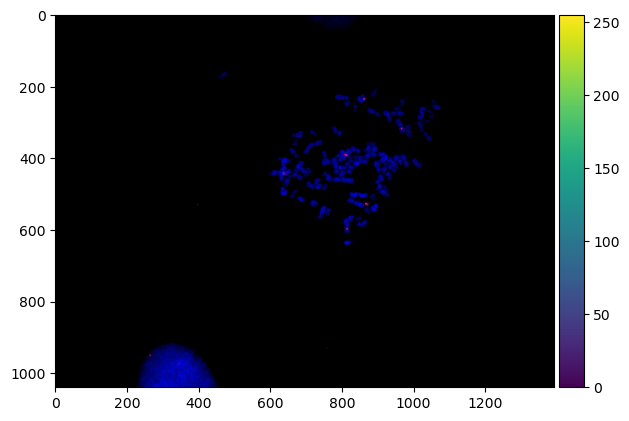

In [22]:
skimage.io.imshow(image)

In [18]:
image = skimage.io.imread(path + imgs[0])

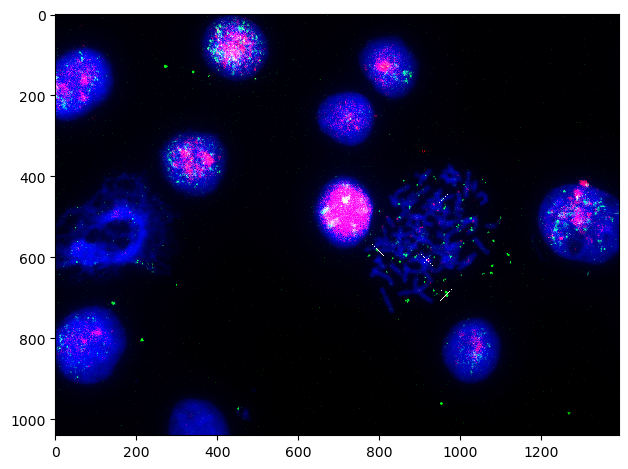

In [50]:
skimage.io.imshow(path + 'ecDNA_Metaphase_dN_DMSO_color_Overlay02.tif')

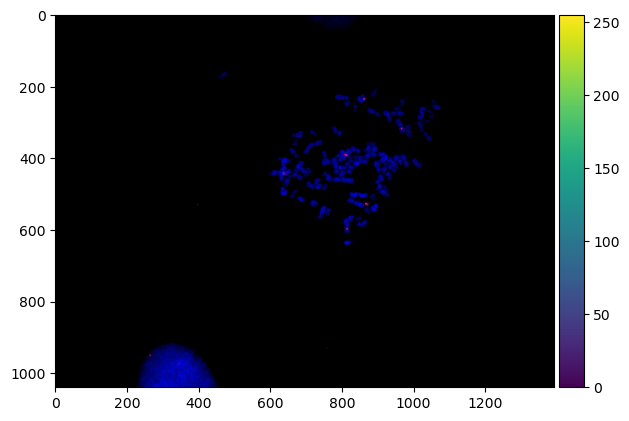

In [48]:
skimage.io.imshow(image)

Number of clusters: 116


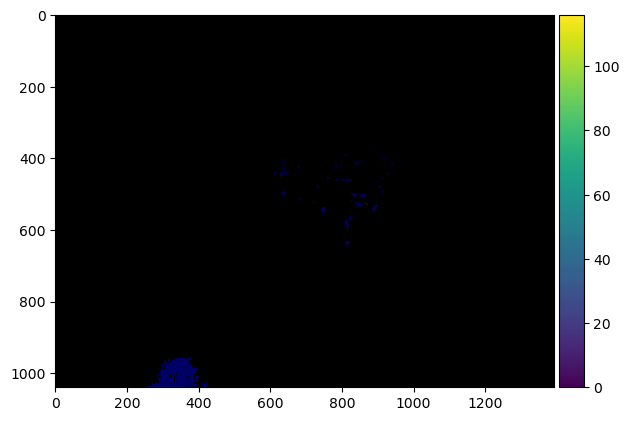

In [52]:
binary_image = image < 150

inverted_image = np.logical_not(binary_image)
labeled_image = skimage.measure.label(inverted_image)

num_clusters = np.max(labeled_image)

print(f'Number of clusters: {num_clusters}')

skimage.io.imshow(labeled_image)
skimage.io.show()

In [ ]:
def process_image(img_path, threshold):
    

In [8]:
test_path = 'train_short/'
test_imgs = os.listdir(test_path)

Number of chromosomes: 79


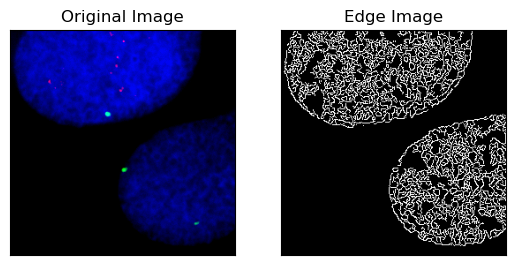

In [81]:
test_img = cv2.imread(test_path + test_imgs[0])
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

edges = cv2.Canny(test_img,25,200)
plt.subplot(121),plt.imshow(test_img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print('Number of chromosomes: ' + str(len(contours)))

In [61]:
def generate_graph(image):
    edges = cv2.Canny(image, 25, 200)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
    G = nx.Graph()
    rows, cols = edges.shape
    for i in range(rows):
        for j in range(cols):
            node = i * cols + j
            G.add_node(node)
            
            if i > 0:
                weight = 1 / abs(int(gray_image[i, j]) - int(gray_image[i - 1, j])) if int(gray_image[i, j]) != int(gray_image[i - 1, j]) else float('inf')
                G.add_edge(node, (i - 1) * cols + j, weight=weight)
            if j > 0:
                weight = 1 / abs(int(gray_image[i, j]) - int(gray_image[i, j - 1])) if int(gray_image[i, j]) != int(gray_image[i, j - 1]) else float('inf')
                G.add_edge(node, i * cols + (j - 1), weight=weight)
    
    return G

In [62]:
def segment_chromosomes(image):
    G = generate_graph(image)
    
    source_node = 0
    sink_node = (image.shape[0] - 1) * image.shape[1]
    
    cut_value, partition = nx.minimum_cut(G, source_node, sink_node)
    
    mask = np.zeros_like(image, dtype=np.uint8)
    for node in partition[0]:
        i, j = divmod(node, image.shape[1])
        mask[i, j] = 255
    
    result = cv2.bitwise_and(image, image, mask=mask)
    
    return result

In [63]:
image = cv2.imread(test_path + test_imgs[0])

segmented_image = segment_chromosomes(image)

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)), plt.title('Segmented Image')
plt.show()

NetworkXUnbounded: Infinite capacity path, flow unbounded above.